In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
women = train_df.loc[train_df.Sex == "female"]["Survived"]
women_survived = (sum(women)/len(women)) * 100
print("The percentage of women who survived is ", round(women_survived, 2), "%", sep = '')


The percentage of women who survived is 74.2%


In [6]:
men = train_df.loc[train_df.Sex == 'male']['Survived']
men_survived = sum(men)/len(men)
print("The percentage of men who survived is ", round(men_survived, 2), "%", sep = '')

The percentage of men who survived is 0.19%


In [7]:
y = train_df['Survived']
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
x = pd.get_dummies(train_df[features])
X_test  = pd.get_dummies(test_df[features])

In [8]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x, y)
predictions = model.predict(X_test)

In [9]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [38]:
survived = output.loc[output.Survived == 1]
notsurvived = output.loc[output.Survived == 0]
total_survived = len(survived)
total_notsurvived = len(notsurvived)
print("The total number of passengers who survived is", total_survived)
print("The total number of passengers who didn't survive is", total_notsurvived)

The total number of passengers who survived is 148
The total number of passengers who didn't survive is 270


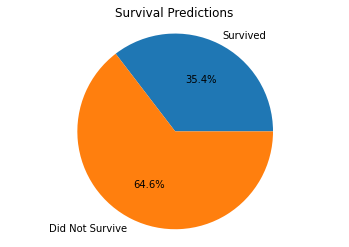

In [40]:
rate = [148, 270]
my_labels = 'Survived', 'Did Not Survive'
plt.pie(rate, labels=my_labels,autopct='%1.1f%%')
plt.title('Survival Predictions')
plt.axis('equal')
plt.show()